sat
[yb2 = 4,
 xb2 = 1,
 ya2 = 23,
 xa3 = 15,
 xa2 = 2,
 yb3 = 24,
 xa1 = 3,
 xb1 = 9,
 xb3 = 17,
 xa4 = 15,
 yb1 = 1,
 yb4 = 13,
 ya3 = 23,
 ya1 = 5]
[[3, 2, 15, 15], [5, 23, 23]]
[(3, 5), (2, 5), (2, 23), (15, 23), (15, 23), (15, 23)]
[(9, 1), (9, 4), (1, 4), (1, 24), (17, 24), (17, 13)]


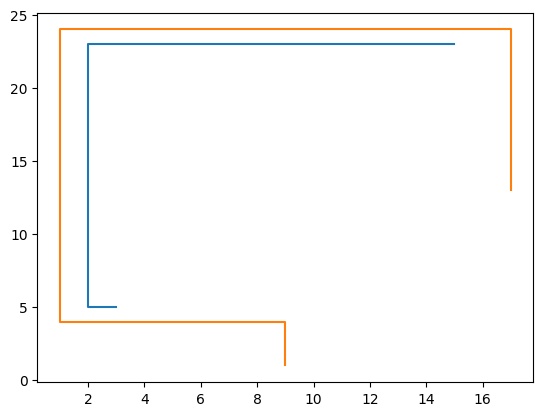

In [95]:
from matplotlib import pyplot as plt

import z3
z3.set_param("parallel.enable", "true")

def Abs(x):
    return z3.If(x >= 0,x,-x)

def Max(x, y):
    return z3.If(x>=y, x, y)

def Min(x, y):
    return z3.If(x<=y, x, y)

def collision(xa1, xa2, ya, xb, yb1, yb2):
    return z3.Or(xb < Min(xa1,xa2) , xb > Max(xa1,xa2) , ya < Min(yb1,yb2) , ya > Max(yb1,yb2))


s = z3.Solver()

xa = [z3.Int(f"xa{i}") for i in range(5)]
ya = [z3.Int(f"ya{i}") for i in range(5)]
xb = [z3.Int(f"xb{i}") for i in range(5)]
yb = [z3.Int(f"yb{i}") for i in range(5)]


xa1 = z3.Int("xa1")
xa2 = z3.Int("xa2")
xa3 = z3.Int("xa3")
xa4 = z3.Int("xa4")

ya1 = z3.Int("ya1")
ya2 = z3.Int("ya2")
ya3 = z3.Int("ya3")

xb1 = z3.Int("xb1")
xb2 = z3.Int("xb2")
xb3 = z3.Int("xb3")
xb4 = z3.Int("xb4")

yb1 = z3.Int("yb1")
yb2 = z3.Int("yb2")
yb3 = z3.Int("yb3")
yb4 = z3.Int("yb4")


#s.add(collision(3,10,5,8,yb1,yb2))
#sig1 = [collision(xa1,xa2,ya1,xb1,yb1,yb2), collision(xb1,xb2,yb2,xa2,ya1,ya2), collision(xa3,xa2,ya2,xb2,yb2,yb3), collision(xb3,xb2,yb3,xa3,ya2,ya3), collision(xa3,xa4,ya4,xb3,yb4,yb3),]
sig1 = [(xa[1],xa[2],ya[1]), (xa[2],ya[1],ya[2]), (xa[3],xa[2],ya[2]), (xa[3],ya[2],ya[3]), (xa[4],xa[3],ya[3])]
sig2 = [(xb[1],yb[1],yb[2]), (xb[1],xb[2],yb[2]), (xb[2],yb[2],yb[3]), (xb[3],xb[2],yb[3]), (xb[3],yb[4],yb[3])]

for i1, s1 in enumerate(sig1):
    for i2, s2 in enumerate(sig2):
        if i1 % 2 == 0:
            if i2 % 2 == 0:
                s.add(collision(s1[0], s1[1], s1[2], s2[0], s2[1], s2[2]))

        if i1 % 2 == 1:
            if i2 % 2 == 1:
                s.add(collision(s2[0], s2[1], s2[2], s1[0], s1[1], s1[2]))
        


s.add(xa[1] == 3)
s.add(ya[1] == 5)
s.add(xa[4] == 15)
s.add(ya[3] == 23)

s.add(xb[1] == 9)
s.add(yb[1] == 1)
s.add(xb[3] == 17)
s.add(yb[4] == 13)

print(s.check())
m = s.model()
print(m)



xav = [m[e].as_long() for e in xa if m[e] is not None]
yav = [m[e].as_long() for e in ya if m[e] is not None]
xbv = [m[e].as_long() for e in xb if m[e] is not None]
ybv = [m[e].as_long() for e in yb if m[e] is not None]

print([xav,yav])

ptsa = [(xav[int(i/2+0.5)], yav[int(i/2)]) for i in range(6)]
print(ptsa)
ptsb = [(xbv[int(i/2)], ybv[int(i/2+0.5)]) for i in range(6)]
print(ptsb)
plt.plot(*zip(*ptsa))
plt.plot(*zip(*ptsb))

#plt.plot(xav[1:],yav)

In [61]:
m[m[0]].as_long()

13

In [12]:
def colision(xa1, xa2, ya, xb, yb1, yb2):
    return xb < min(xa1,xa2) or xb > max(xa1,xa2) or ya < min(yb1,yb2) or ya > max(yb1,yb2)

In [14]:
colision(3, 8, 5, 3, 1, 9)

False

In [9]:
l1 = [5, 4, 2, -3,1]
x = 0
y = 0
pts = []
for i, e in enumerate(l1):
    print(f"{i}:{e}")
    if i % 2 == 0:
        x += e
    else:
        y += e
    pts.append((x,y))
print(pts)

0:5
1:4
2:2
3:-3
4:1
[(5, 0), (5, 4), (7, 4), (7, 1), (8, 1)]


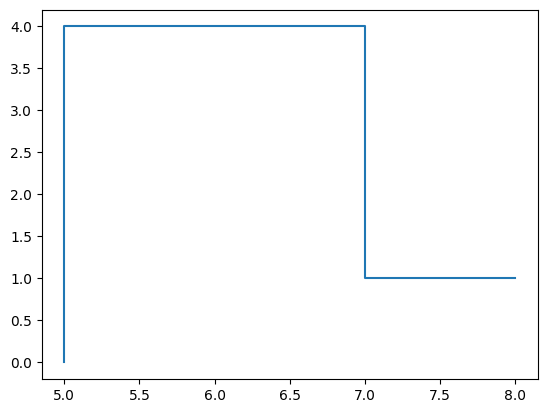

In [10]:
from matplotlib import pyplot as plt
plt.plot(*zip(*pts))